<a href="https://colab.research.google.com/github/abdallah155/weather-forecast/blob/main/weather_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
import tensorflow as tf

import tensorflow_datasets as tfds
import pandas as pd
#from keras.layers.core import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.callbacks import TensorBoard
#from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from random import random
from PIL import Image
#import theano
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:

dir = "/content/gdrive/MyDrive/Train"
CATEGORIES =  ["dew","fogsmog","frost","glaze","hail","lightning","rain","rainbow","rime","sandstorm","snow"]


In [ ]:
import os
for category in CATEGORIES:  #
    path = os.path.join(dir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

FileNotFoundError: ignored

In [ ]:
print(img_array.shape)

(278, 400, 3)


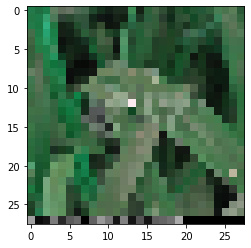

In [ ]:
IMG_SIZE = 28

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(dir,category)  # create path to all weather
        class_num = CATEGORIES.index(category)  # get the classification  (0--->10)

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

100%|██████████| 520/520 [00:09<00:00, 57.02it/s] 


In [ ]:
print(len(training_data))

5550


In [ ]:
import random
random.shuffle(training_data)


In [ ]:
for sample in training_data[:10]:
    print(sample[1])

9
8
4
3
9
1
0
4
7
0


In [ ]:
X =[]
y =[]
for features, label in training_data:
  X.append(features)
  y.append(label)
X = np.array(X) #.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
X = X.astype('float32')

X /= 255
from keras.utils import np_utils
Y = np_utils.to_categorical(y, 11)

In [ ]:
print(Y.shape)
print(X.shape)

(5550, 11)
(5550, 28, 28, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,  test_size = 0.2, random_state = 4)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=10,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',

    )
train_datagen.fit(X_train)


In [ ]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  strides=2,
#                  activation='relu',
#                  input_shape=(IMG_SIZE, IMG_SIZE, 3)))
# model.add(Dropout(0.5))
# model.add(Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(11, activation='softmax'))
# model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
# print(model.summary())

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Load libraries
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
import math
# Set random seed
np.random.seed(0)

def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,
           math.floor((1+epoch)/epochs_drop))
   return lrate

#with strategy.scope():

model=Sequential()
model.add(Conv2D(784,(3,3), input_shape = (IMG_SIZE,IMG_SIZE,3),padding='same',activation='relu'))

                   # pooling step
model.add(AveragePooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

                   # adding another layer and pooling it
model.add(Conv2D(392,(3,3),padding='same',activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

                    # adding another layer and pooling it
model.add(Conv2D(196,(3,3),padding='same',activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(98,(3,3),padding='same',activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())

                            # flattening step
model.add(Flatten())

                    # first full connection layer
model.add(Dense(units=784,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

        # second full connection layer
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

                               # output layer
model.add(Dense(units=11,activation="softmax"))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate= 0.01, momentum= 0.9, decay=0.0,nesterov=True),loss='categorical_crossentropy',
                    metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 784)       21952     
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 784)      0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 784)      3136      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 392)       2766344   
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 392)        0         
 ePooling2D)                                                     
                                                        

In [ ]:
Train_gen=train_datagen.flow(X_train, y_train,batch_size=256)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
lrate = LearningRateScheduler(step_decay)
model.fit(train_datagen.flow(X_train, y_train,batch_size=256),batch_size=128,epochs=100,verbose=1,validation_data=(X_test,y_test))

Epoch 1/100
18/18 [==============================] - 24s 398ms/step - loss: 2.2850 - accuracy: 0.3025 - val_loss: 6.4136 - val_accuracy: 0.0910
Epoch 2/100
18/18 [==============================] - 3s 185ms/step - loss: 1.7316 - accuracy: 0.4437 - val_loss: 22.7955 - val_accuracy: 0.1063
Epoch 3/100
18/18 [==============================] - 3s 172ms/step - loss: 1.5959 - accuracy: 0.4818 - val_loss: 25.7599 - val_accuracy: 0.1063
Epoch 4/100
18/18 [==============================] - 3s 170ms/step - loss: 1.5302 - accuracy: 0.5018 - val_loss: 26.0898 - val_accuracy: 0.1063
Epoch 5/100
18/18 [==============================] - 3s 175ms/step - loss: 1.4752 - accuracy: 0.5047 - val_loss: 20.0491 - val_accuracy: 0.1063
Epoch 6/100
18/18 [==============================] - 3s 180ms/step - loss: 1.4183 - accuracy: 0.5367 - val_loss: 15.8064 - val_accuracy: 0.1063
Epoch 7/100
18/18 [==============================] - 3s 180ms/step - loss: 1.4154 - accuracy: 0.5320 - val_loss: 13.7317 - val_accuracy:

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

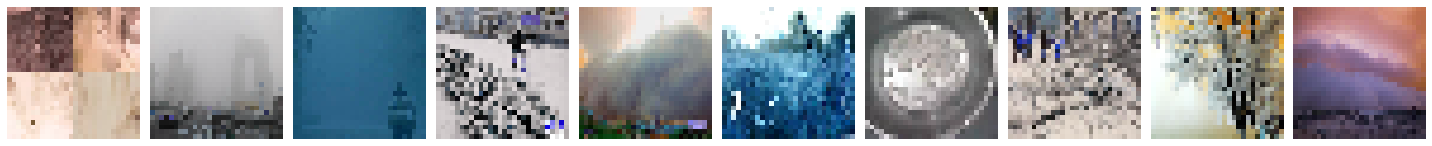

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
plotImages(X_train)
print(y_train)

In [ ]:
import math
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import f1_score

Y_2 = np.array(Y)


#training and cross validation with regularisation
kfold = RepeatedKFold(n_splits=5,n_repeats=2)
cvscores = []
iteration = 1
f1scores = []

for train_index, test_index in kfold.split(X,Y.argmax(1)):

    x_train,x_test=X[train_index],X[test_index]
    y_train,y_test=Y_2[train_index],Y_2[test_index]
    lrate = LearningRateScheduler(step_decay)
    #callbacks=lrate
    #model.fit_generator(data_gen.flow(x_train, y_train,batch_size=512),epochs=10,verbose=1,validation_data=(x_test,y_test))
    model.fit(train_datagen.flow(x_train, y_train,batch_size=256),batch_size=256,epochs=200,verbose=1,validation_data=(x_test,y_test))
    scores=model.evaluate(x_test, y_test, verbose=0)
    cvscores.append(scores[1] * 100)
    #calculate F1 score
    y_pred = model.predict(x_test, batch_size=256,verbose=1)
    #y_pred = np.argmax(y_pred, axis = 1)
    #f1 = f1_score(y_test, y_pred, average='macro')
    #f1scores.append(f1)
    iteration = iteration + 1
print("Accuracy: %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
#print("F1: %.2f%% (+/- %.2f%%)" % (numpy.mean(f1scores), numpy.std(f1scores)))


Epoch 1/200
139/139 [==============================] - 347s 2s/step - loss: 1.7949 - accuracy: 0.4124 - val_loss: 145.5406 - val_accuracy: 0.0892
Epoch 2/200
139/139 [==============================] - 344s 2s/step - loss: 1.7138 - accuracy: 0.4250 - val_loss: 208.5913 - val_accuracy: 0.1108
Epoch 3/200
139/139 [==============================] - 340s 2s/step - loss: 1.6136 - accuracy: 0.4779 - val_loss: 1595.8154 - val_accuracy: 0.0991
Epoch 4/200
139/139 [==============================] - 346s 2s/step - loss: 1.5706 - accuracy: 0.4851 - val_loss: 6211.7573 - val_accuracy: 0.1099
Epoch 5/200
139/139 [==============================] - 345s 2s/step - loss: 1.5338 - accuracy: 0.4998 - val_loss: 12178.2568 - val_accuracy: 0.1099
Epoch 6/200
139/139 [==============================] - 345s 2s/step - loss: 1.5118 - accuracy: 0.5007 - val_loss: 17678.3730 - val_accuracy: 0.1099
Epoch 7/200
139/139 [==============================] - 343s 2s/step - loss: 1.4894 - accuracy: 0.5086 - val_loss: 1584

In [ ]:

# model = Sequential()

# activation = 'relu'
# model = Sequential()
# model.add(Conv2D(16, (3,3), activation = activation, padding = 'same', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
# model.add(Dropout(0.4))
# model.add(MaxPooling2D((2,2) , strides=(2,2)))

# model.add(Conv2D(32, 3, activation = activation, padding = 'same'))
# model.add(Dropout(0.4))
# model.add(MaxPooling2D((2,2) , strides=(2,2)))

# model.add(Conv2D(64, 3, activation = activation, padding = 'same'))
# model.add(Dropout(0.4))
# model.add(MaxPooling2D((2,2) , strides=(2,2)))

# model.add(Flatten())

# model.add(Dropout(0.5))
# model.add(Dense(128, activation = activation))
# model.add(Dropout(0.6))


# model.add(Dense(11, activation = 'softmax'))

# model.compile(optimizer ='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
# print(model.summary())

In [ ]:
# my_callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=1),
    # tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
# ]
# history = model.fit(X_train, y_train, batch_size=32, epochs=30, callbacks=my_callbacks , validation_data = (X_test, y_test))

In [ ]:
# history = model.fit(X_train, y_train , batch_size = 32, epochs = 30, verbose = 1 , validation_split=0.1)

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print(f"Test Score: {score[0]:.2f}")
print(f"Test accuracy: {score[1]*100:.3f}%")

In [ ]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

In [ ]:

img_names =[]
test= []
for img in sorted(os.listdir("/content/gdrive/MyDrive/Test/")):

  img_names.append(img)
  images_path= os.path.join("/content/gdrive/MyDrive/Test/",img)
  imgdata = cv2.imread(images_path)

  if(images_path =="/content/gdrive/MyDrive/Test/test_1297.jpg" ):
    imgdata = cv2.imread("/content/gdrive/MyDrive/Test/test_1.jpg",1)
    imgdata = cv2.resize(np.array(imgdata),(IMG_SIZE,IMG_SIZE))
    test.append(np.array(imgdata))


    continue
  else:
    imgdata = cv2.resize(np.array(imgdata),(IMG_SIZE,IMG_SIZE))
    test.append(np.array(imgdata))

test =np.array(test)



In [ ]:
test = test / 255.0

In [ ]:
predict = model.predict(test)
predict2 = np.argmax(predict,axis=1)

In [ ]:
predict2

In [ ]:
df = pd.DataFrame (img_names, columns = ['image_name'])

In [ ]:
df2 = pd.DataFrame (predict2, columns = ['label'])

df2

In [ ]:
frames = [df, df2]

result = pd.concat([df, df2], axis=1, join='inner')

result

In [ ]:
result.to_csv('DADAH.csv', index=False)